
BANK CUSTOMER CHURN MODEL


Objective: To predict whether a customer is going to leave the bank or not.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the Data:

In [2]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
# let's use customerID as index
df = df.set_index('CustomerId')

In [10]:
df.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [17]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [19]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [20]:
df.replace({"Num Of Products":{1:0,2:1,3:1,4:1}},inplace = True)

In [21]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [23]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [24]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [28]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

In [29]:
df['Zero Balance'].value_counts()

1    6383
0    3617
Name: Zero Balance, dtype: int64

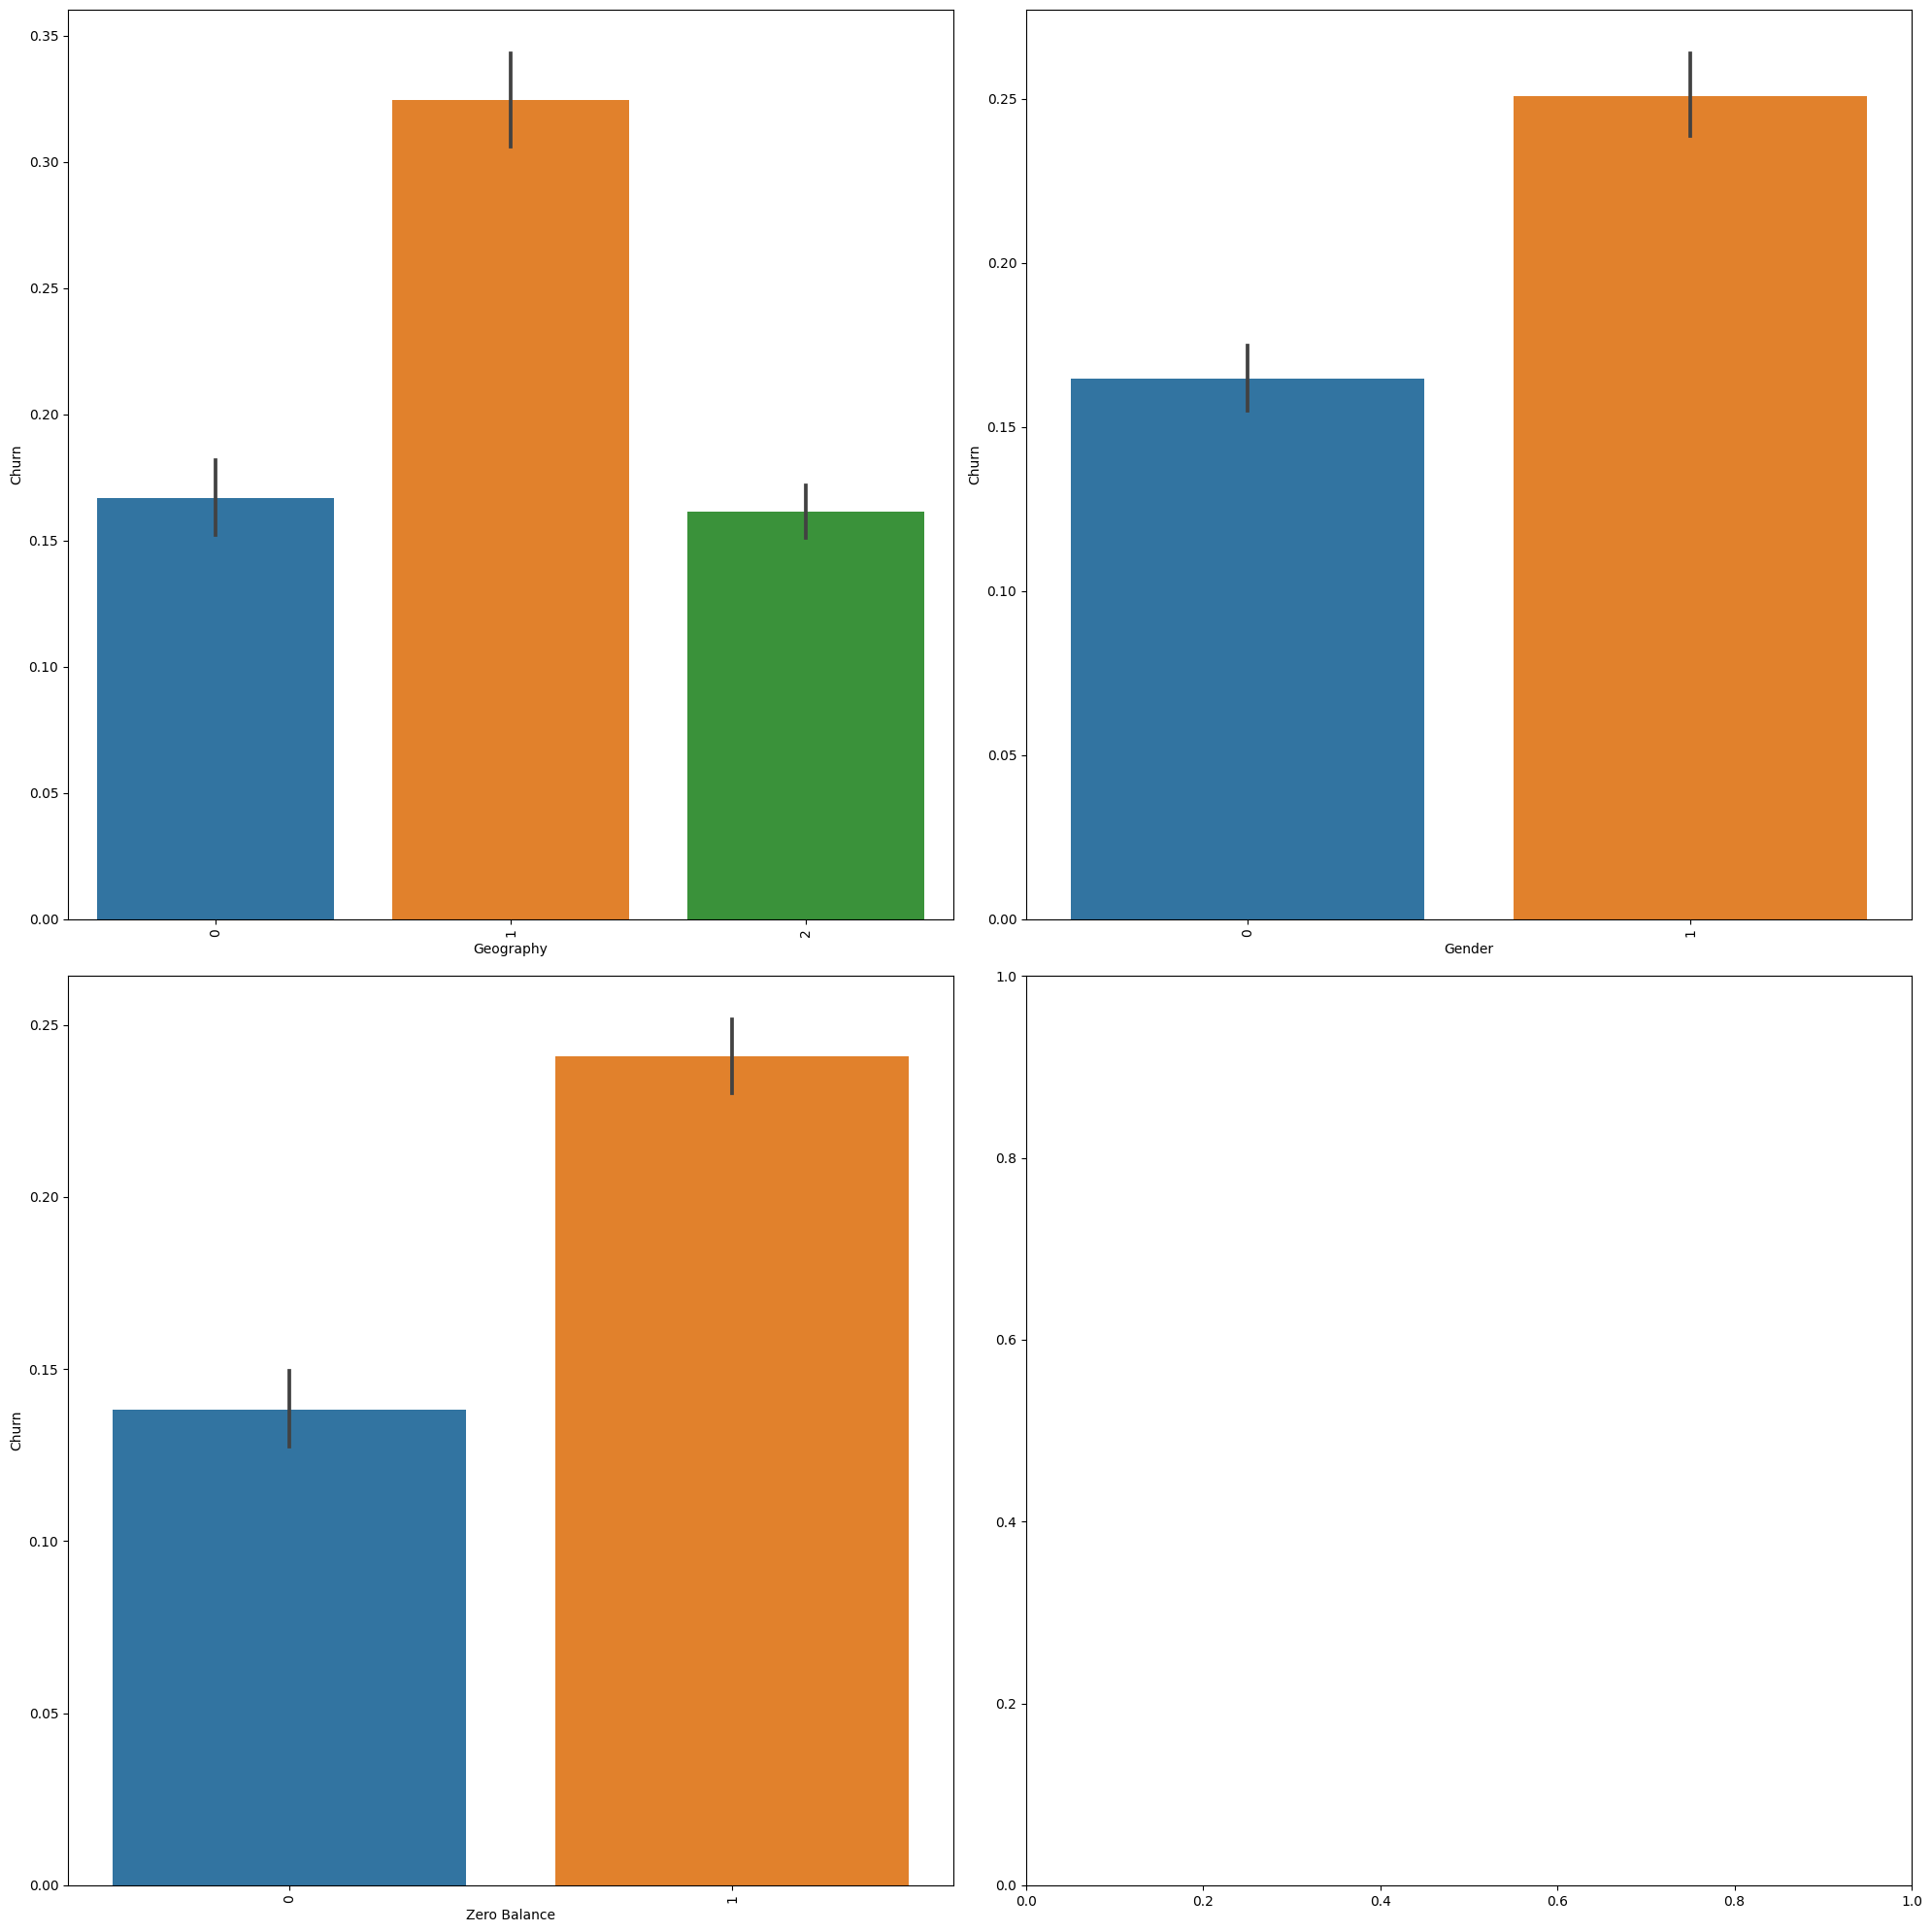

In [135]:
# list of categorical variables to plot
cat_vars = ['Geography','Gender','Zero Balance']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Churn', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()


In [136]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

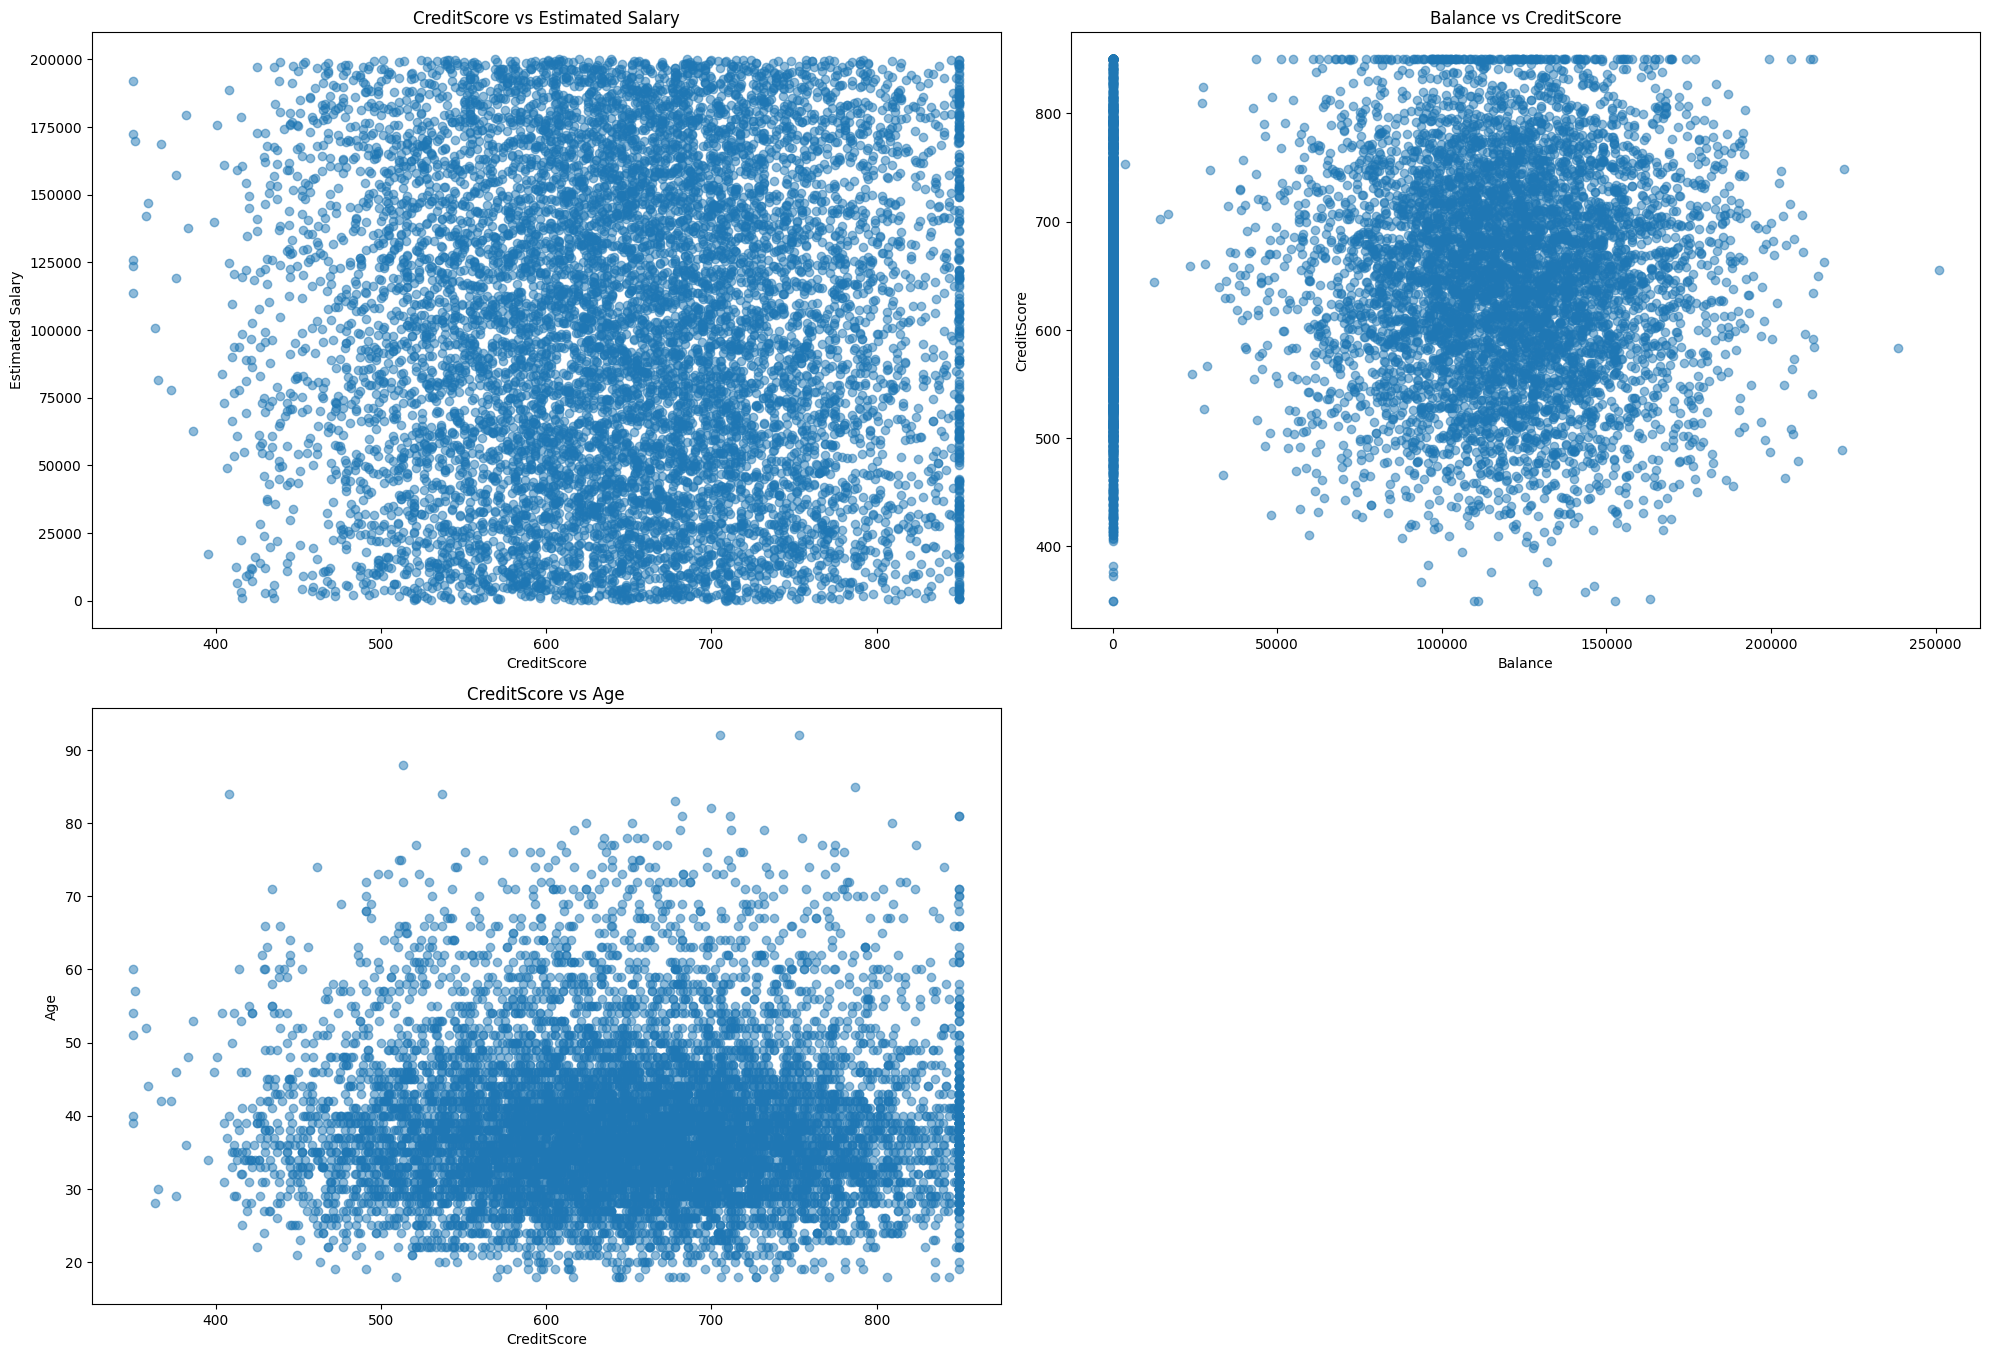

In [138]:
variables = [
    ('CreditScore', 'Estimated Salary'),
    ('Balance', 'CreditScore'),
    ('CreditScore', 'Age')
]

# Calculate the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 2

# Create a new figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through each variable
for i, (x_var, y_var) in enumerate(variables):
    # Create a scatter plot
    axs[i].scatter(df[x_var], df[y_var], alpha=0.5)
    axs[i].set_xlabel(x_var)
    axs[i].set_ylabel(y_var)
    axs[i].set_title(f'{x_var} vs {y_var}')

# Remove any empty subplots if present
if len(variables) < num_rows * num_cols:
    for j in range(len(variables), num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

Define Label and Features

In [31]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [32]:
X = df.drop(['Surname','Churn'], axis = 1)

In [38]:
y = df['Churn']

In [34]:
#Handling Imbalance Data

In [35]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [36]:
#UnderSampling
from imblearn.under_sampling import RandomUnderSampler

In [39]:
RUS = RandomUnderSampler(random_state =2529)
X_rus,y_rus = RUS.fit_resample(X,y)

In [40]:
X_rus.shape,y_rus.shape,X.shape

((4074, 11), (4074,), (10000, 11))

In [41]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

In [42]:
#OverSampling
from imblearn.over_sampling import RandomOverSampler

In [44]:
ROS = RandomOverSampler(random_state =2529)

In [54]:
X_ros,y_ros = ROS.fit_resample(X,y)

Train Test split

In [48]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.2, random_state = 25)

In [63]:
X_t_rus,X_tt_rus,y_t_rus,y_tt_rus =train_test_split(X_rus,y_rus, test_size = 0.2, random_state = 25)

In [64]:
X_t_ros,X_tt_ros,y_t_ros,y_tt_ros =train_test_split(X_ros,y_ros, test_size = 0.2, random_state = 25)

Preprocessing

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
Sc = StandardScaler()


In [67]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =Sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [68]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =Sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [69]:
X_t_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =Sc.fit_transform(X_t_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [72]:
X_tt_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =Sc.fit_transform(X_tt_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [73]:
X_t_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =Sc.fit_transform(X_t_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [74]:
X_tt_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =Sc.fit_transform(X_tt_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Modeling

In [75]:
from sklearn.svm import SVC

In [76]:
svc = SVC()

In [77]:
svc.fit(X_train, y_train)

SVC()

In [78]:
y_pred = svc.predict(X_test)

In [91]:
svc_u =SVC()

In [93]:
svc_u.fit(X_t_rus, y_t_rus)

SVC()

In [101]:
y_tt_rus_pred = svc_u.predict(X_tt_rus)

In [102]:
svc_o = SVC()

In [103]:
svc_o.fit(X_t_ros, y_t_ros)

SVC()

In [104]:
y_tt_ros_pred = svc_o.predict(X_tt_ros)

Model Evaluation

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
confusion_matrix(y_test,y_pred)

array([[1580,   30],
       [ 287,  103]])

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1610
           1       0.77      0.26      0.39       390

    accuracy                           0.84      2000
   macro avg       0.81      0.62      0.65      2000
weighted avg       0.83      0.84      0.81      2000



In [113]:
#pretty bad
#Hyperparameter tuning using GridSearchCV

In [114]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid = {'C':[0.1,1,10],'gamma': [1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [120]:
grid =GridSearchCV(SVC(),param_grid,refit=True, verbose=2, cv =2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [123]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [124]:
grid_predictions = grid.predict(X_test)

In [125]:
confusion_matrix(y_test,grid_predictions)

array([[1341,  269],
       [ 168,  222]])

In [127]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1610
           1       0.45      0.57      0.50       390

    accuracy                           0.78      2000
   macro avg       0.67      0.70      0.68      2000
weighted avg       0.80      0.78      0.79      2000



Randomundersampling

In [108]:
confusion_matrix(y_tt_rus,y_tt_rus_pred)

array([[308,  86],
       [110, 311]])

In [109]:

print(classification_report(y_tt_rus,y_tt_rus_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       394
           1       0.78      0.74      0.76       421

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



Randomoversampling

In [110]:
confusion_matrix(y_tt_ros,y_tt_ros_pred)

array([[1244,  375],
       [ 385, 1182]])

In [111]:
print(classification_report(y_tt_ros,y_tt_ros_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1619
           1       0.76      0.75      0.76      1567

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



Hyperparameter tuning for the Random over sampling data

In [128]:
param_grid = {'C':[0.1,1,10],'gamma': [1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [129]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose =2,cv =2)

In [130]:
grid_ros.fit(X_t_ros,y_t_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [131]:
grid_ros_pred = grid_ros.predict(X_tt_ros)

In [132]:
confusion_matrix(grid_ros_pred,y_tt_ros)

array([[1402,   36],
       [ 217, 1531]])

In [133]:
print(classification_report(grid_ros_pred,y_tt_ros))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1438
           1       0.98      0.88      0.92      1748

    accuracy                           0.92      3186
   macro avg       0.92      0.93      0.92      3186
weighted avg       0.93      0.92      0.92      3186



In [134]:
#RandomOversampling+Hyperparametertuning produced the best results